# Problem 2: Numerical simulation of third-harmonic generation 
We have tried to numerically solve the coupled amplitude equations by dividing the domain into small steps(1000 steps taken here for a length of 1 unit). The differential is approximated to the difference in values as the step size is 'small'. 
Therefore, we calculate the values of $A_w$ and $A_{3w}$ at each step by using the difference equation derived from the differential equation. 
$$\Delta A_{3w} = i \kappa A_w^3 e^{i\Delta kz} \Delta z$$
$$\Delta A_{w} = i \kappa A_{3w} A_w^{*2} e^{-i\Delta kz} \Delta z$$
$\Delta z$ is the step size used and $A_w$ and $A_3w$ are updated at each step

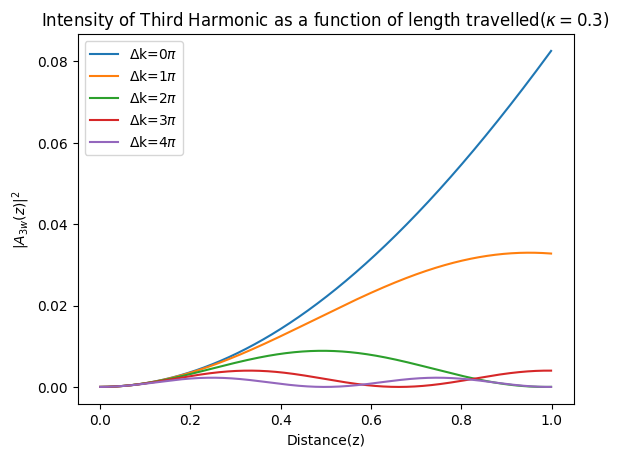

In [42]:
import matplotlib.pyplot as plt 
import numpy as np

kappa = 0.3

delta_k = np.zeros(5)
for k in range(5):
    delta_k[k] = k*np.pi

L = 1
steps = 1000
step_size = L/steps
x = np.arange(0,L,step_size)


a_w = np.zeros((steps,5))
a_3w = np.zeros((steps,5))

for k in range(5):
    A_w=1+0j
    A_3w = 0+0j
    for i in range(steps):
        z = i*step_size
        delta_A_w = 1j*kappa*A_3w*(A_w.conjugate())**2*np.exp(-1*1j*delta_k[k]*z)*step_size
        delta_A_3w = 1j*kappa*(A_w)**3*np.exp(1j*delta_k[k]*z)*step_size
        A_w = A_w + delta_A_w
        A_3w = A_3w + delta_A_3w
        a_w[i][k] = abs(A_w)**2
        a_3w[i][k] = abs(A_3w)**2


fig, ax = plt.subplots()  # Create a figure containing a single axes
for k in range(5):
    ax.plot(x,a_3w[:,k], label=r'$\Delta$k={}$\pi$'.format(k))

ax.set_title(r'Intensity of Third Harmonic as a function of length travelled$(\kappa=0.3)$')
ax.set_xlabel('Distance(z)')
ax.set_ylabel(r'$|A_{3w}(z)|^2$')
ax.legend()
 

### (a)

We get the plot for Intensity of the Third Harmonic as a function of distance(z).  
For $\Delta k = 0$, the intensity varies almost quadratically with distance, while as the phase mismatch increases the curve takes a sinusoidal ((square of sine) form and the peak intensity decreases as the phase mismatch increases. 

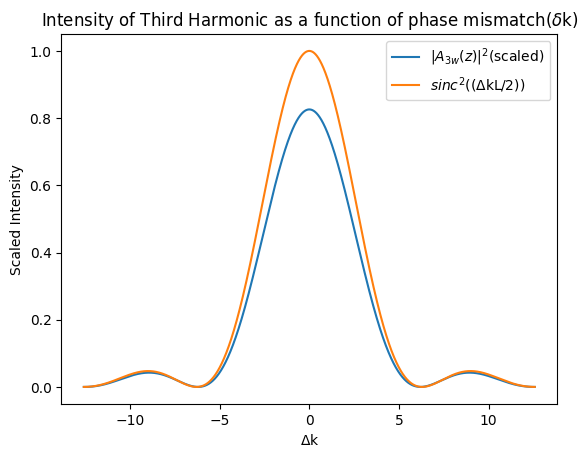

In [58]:
kappa = 0.3

delta_k = np.arange(-4*np.pi, 4*np.pi, 8*np.pi/10000)

L = 1
steps = 1000
step_size = L/steps
x = np.arange(0,L,step_size)

a_3w = np.zeros(10000)

for k in range(10000):
    A_w=1+0j
    A_3w = 0+0j
    for i in range(steps):
        z = i*step_size
        delta_A_w = 1j*kappa*A_3w*(A_w.conjugate())**2*np.exp(-1*1j*delta_k[k]*z)*step_size
        delta_A_3w = 1j*kappa*(A_w)**3*np.exp(1j*delta_k[k]*z)*step_size
        A_w = A_w + delta_A_w
        A_3w = A_3w + delta_A_3w
    a_3w[k] = abs(A_3w)**2

plt.plot(delta_k,a_3w*10, label=r'$|A_{3w}(z)|^2$(scaled)')
plt.plot(delta_k, (np.sin(delta_k*L/2)/(delta_k*L/2))**2, label=r'$sinc^2$(($\Delta$kL/2))')
plt.ylabel('Scaled Intensity')
plt.xlabel(r'$\Delta$k')
plt.title(r'Intensity of Third Harmonic as a function of phase mismatch($\delta$k)')
plt.legend()

### (b)

The scaled curve matches the $sinc^2$ function as the conversion efficiency is low and the undepleted pump approximation leads to that shape.

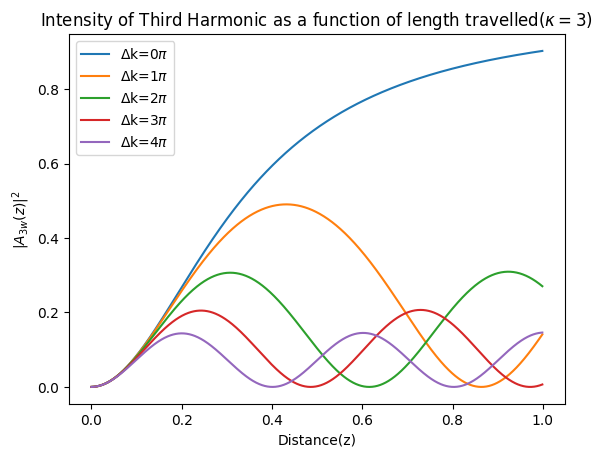

In [44]:
kappa = 3

delta_k = np.zeros(5)
for k in range(5):
    delta_k[k] = k*np.pi

L = 1
steps = 1000
step_size = L/steps
x = np.arange(0,L,step_size)


a_w = np.zeros((steps,5))
a_3w = np.zeros((steps,5))

for k in range(5):
    A_w=1+0j
    A_3w = 0+0j
    for i in range(steps):
        z = i*step_size
        delta_A_w = 1j*kappa*A_3w*(A_w.conjugate())**2*np.exp(-1*1j*delta_k[k]*z)*step_size
        delta_A_3w = 1j*kappa*(A_w)**3*np.exp(1j*delta_k[k]*z)*step_size
        A_w = A_w + delta_A_w
        A_3w = A_3w + delta_A_3w
        a_w[i][k] = abs(A_w)**2
        a_3w[i][k] = abs(A_3w)**2


fig, ax = plt.subplots()  # Create a figure containing a single axes
for k in range(5):
    ax.plot(x,a_3w[:,k], label=r'$\Delta$k={}$\pi$'.format(k))

ax.set_title(r'Intensity of Third Harmonic as a function of length travelled$(\kappa=3)$')
ax.set_xlabel('Distance(z)')
ax.set_ylabel(r'$|A_{3w}(z)|^2$')
ax.legend()
 

### (c)

We get the plot for Intensity of the Third Harmonic as a function of distance(z).  
The curve for $\Delta k$ = 0 takes the expected quadratic form for low efficiencies, but then tapers (to asymptotically approach 1).  
While as the phase mismatch increases the curve takes a sinusoidal (square of sine) form and the peak intensity decreases as the phase mismatch increases.  
It is to be noted that the time period of the sinusiodal curves has decreased as compared to part (a)

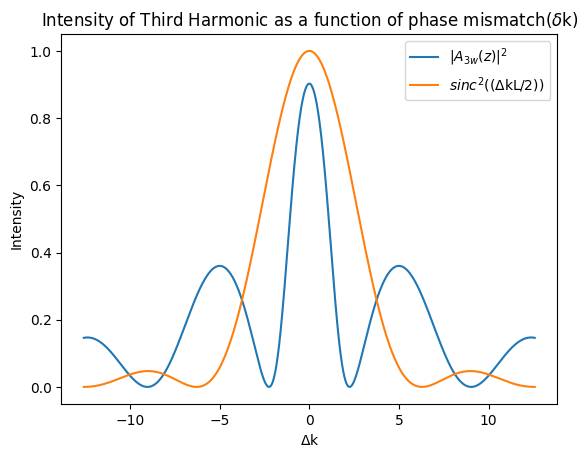

In [57]:
kappa = 3

delta_k = np.arange(-4*np.pi, 4*np.pi, 8*np.pi/10000)

L = 1
steps = 1000
step_size = L/steps
x = np.arange(0,L,step_size)

a_3w = np.zeros(10000)

for k in range(10000):
    A_w=1+0j
    A_3w = 0+0j
    for i in range(steps):
        z = i*step_size
        delta_A_w = 1j*kappa*A_3w*(A_w.conjugate())**2*np.exp(-1*1j*delta_k[k]*z)*step_size
        delta_A_3w = 1j*kappa*(A_w)**3*np.exp(1j*delta_k[k]*z)*step_size
        A_w = A_w + delta_A_w
        A_3w = A_3w + delta_A_3w
    a_3w[k] = abs(A_3w)**2

plt.plot(delta_k,a_3w, label=r'$|A_{3w}(z)|^2$')
plt.plot(delta_k, (np.sin(delta_k*L/2)/(delta_k*L/2))**2, label=r'$sinc^2$(($\Delta$kL/2))')
plt.ylabel('Intensity')
plt.xlabel(r'$\Delta$k')
plt.title(r'Intensity of Third Harmonic as a function of phase mismatch($\delta$k)')
plt.legend()

### (d)

The scaled curve does not match $sinc^2$ function because with higher $\kappa$, we have higher conversion efficiency and hence the constant pump approximation no more remains valid.